# TON_IoT Dataset - Full EDA, Scaling, Modeling & PCA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.decomposition import PCA

sns.set(style='whitegrid')
import warnings
warnings.filterwarnings("ignore")


## Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/TON_IoT_Train_Test_Network.csv")

## Dataset Overview

In [ ]:
print("Dataset Shape:", df.shape)
df.info()

Dataset Shape: (461043, 45)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461043 entries, 0 to 461042
Data columns (total 45 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ts                      461043 non-null  int64  
 1   src_ip                  461043 non-null  object 
 2   src_port                461043 non-null  int64  
 3   dst_ip                  461043 non-null  object 
 4   dst_port                461043 non-null  int64  
 5   proto                   461043 non-null  object 
 6   service                 461043 non-null  object 
 7   duration                461043 non-null  float64
 8   src_bytes               461043 non-null  int64  
 9   dst_bytes               461043 non-null  int64  
 10  conn_state              461043 non-null  object 
 11  missed_bytes            461043 non-null  int64  
 12  src_pkts                461043 non-null  int64  
 13  src_ip_bytes            461043 non-null  int64

## Data Cleaning & Null Handling

In [ ]:
df.head()

,ts,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,...,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label,type
0,1554198358,3.122.49.24,1883,192.168.1.152,52976,tcp,-,80549.530260,1762852,41933215,...,0,0,-,-,-,bad_TCP_checksum,-,F,0,normal
1,1554198358,192.168.1.79,47260,192.168.1.255,15600,udp,-,0.000000,0,0,...,0,0,-,-,-,-,-,-,0,normal
2,1554198359,192.168.1.152,1880,192.168.1.152,51782,tcp,-,0.000000,0,0,...,0,0,-,-,-,bad_TCP_checksum,-,F,0,normal
3,1554198359,192.168.1.152,34296,192.168.1.152,10502,tcp,-,0.000000,0,0,...,0,0,-,-,-,-,-,-,0,normal
4,1554198362,192.168.1.152,46608,192.168.1.190,53,udp,dns,0.000549,0,298,...,0,0,-,-,-,bad_UDP_checksum,-,F,0,normal


In [ ]:
# Replace dashes with NaNs and drop missing values
df2 = df.replace("-", np.nan)

In [ ]:
df2.head()

,ts,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,...,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label,type
0,1554198358,3.122.49.24,1883,192.168.1.152,52976,tcp,NaN,80549.530260,1762852,41933215,...,0,0,NaN,NaN,NaN,bad_TCP_checksum,NaN,F,0,normal
1,1554198358,192.168.1.79,47260,192.168.1.255,15600,udp,NaN,0.000000,0,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,normal
2,1554198359,192.168.1.152,1880,192.168.1.152,51782,tcp,NaN,0.000000,0,0,...,0,0,NaN,NaN,NaN,bad_TCP_checksum,NaN,F,0,normal
3,1554198359,192.168.1.152,34296,192.168.1.152,10502,tcp,NaN,0.000000,0,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,normal
4,1554198362,192.168.1.152,46608,192.168.1.190,53,udp,dns,0.000549,0,298,...,0,0,NaN,NaN,NaN,bad_UDP_checksum,NaN,F,0,normal


In [ ]:
# check for the number and percentage of missing values for each column
missing_values = df2.isnull().sum()
missing_percentage = (missing_values / len(df2)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Missing Percentage': missing_percentage})

In [ ]:
missing_df

,Missing Values,Missing Percentage
ts,0,0.000000
src_ip,0,0.000000
src_port,0,0.000000
dst_ip,0,0.000000
dst_port,0,0.000000
proto,0,0.000000
service,280216,60.778713
duration,0,0.000000
src_bytes,0,0.000000
dst_bytes,0,0.000000


In [ ]:
# Drop columns with over 20% of the values missing
columns_to_drop = missing_df[missing_df['Missing Percentage'] > 20].index
df3 = df2.drop(columns=columns_to_drop)
print("Shape after dropping columns:", df3.shape)

Shape after dropping columns: (461043, 23)


In [ ]:
df3.head()

,ts,src_ip,src_port,dst_ip,dst_port,proto,duration,src_bytes,dst_bytes,conn_state,...,dst_pkts,dst_ip_bytes,dns_qclass,dns_qtype,dns_rcode,http_request_body_len,http_response_body_len,http_status_code,label,type
0,1554198358,3.122.49.24,1883,192.168.1.152,52976,tcp,80549.530260,1762852,41933215,OTH,...,2,236,0,0,0,0,0,0,0,normal
1,1554198358,192.168.1.79,47260,192.168.1.255,15600,udp,0.000000,0,0,S0,...,0,0,0,0,0,0,0,0,0,normal
2,1554198359,192.168.1.152,1880,192.168.1.152,51782,tcp,0.000000,0,0,OTH,...,0,0,0,0,0,0,0,0,0,normal
3,1554198359,192.168.1.152,34296,192.168.1.152,10502,tcp,0.000000,0,0,OTH,...,0,0,0,0,0,0,0,0,0,normal
4,1554198362,192.168.1.152,46608,192.168.1.190,53,udp,0.000549,0,298,SHR,...,2,354,0,0,0,0,0,0,0,normal


## Label and Attack Type Distribution

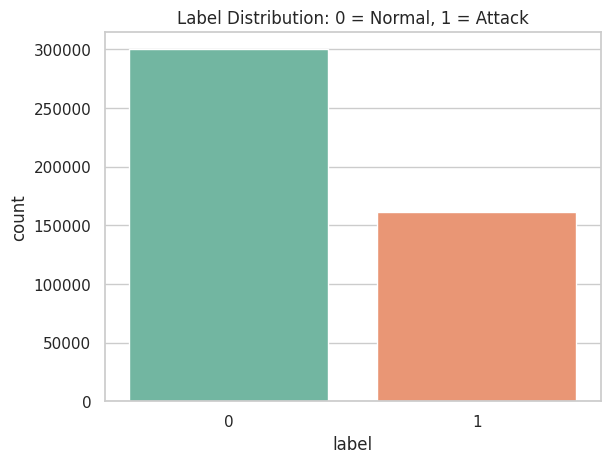

In [ ]:
# Binary label distribution
sns.countplot(x='label', data=df3, palette='Set2')
plt.title('Label Distribution: 0 = Normal, 1 = Attack')
plt.show()

In [ ]:
# List of all the columns
df3.columns

Index(['ts', 'src_ip', 'src_port', 'dst_ip', 'dst_port', 'proto', 'duration',
       'src_bytes', 'dst_bytes', 'conn_state', 'missed_bytes', 'src_pkts',
       'src_ip_bytes', 'dst_pkts', 'dst_ip_bytes', 'dns_qclass', 'dns_qtype',
       'dns_rcode', 'http_request_body_len', 'http_response_body_len',
       'http_status_code', 'label', 'type'],
      dtype='object')

In [ ]:
label = df3.groupby('label')

In [ ]:
label['duration'].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,300000.0,8.269763,329.258020,0.0,0.0,0.000000,0.022904,85274.35460
1,161043.0,8.853064,632.113384,0.0,0.0,0.000164,0.021584,93516.92917


Text(0.5, 1.0, 'Source Bytes Distribution by Class')

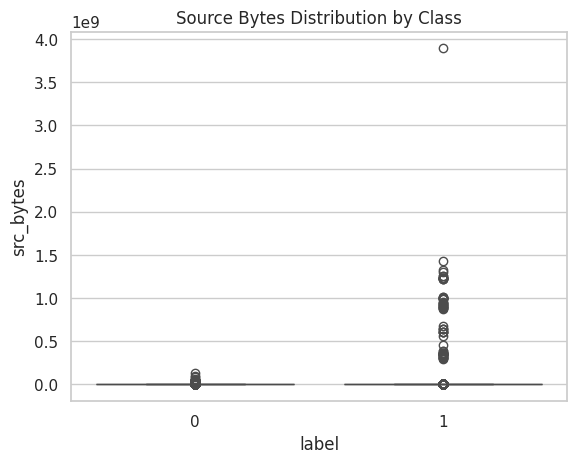

In [ ]:
sns.boxplot(data=df3, x='label', y='src_bytes')
plt.title("Source Bytes Distribution by Class")

In [ ]:
df4 = df3.copy()

Column 'src_ip' could not be converted to numeric and will be dropped.
Column 'dst_ip' could not be converted to numeric and will be dropped.
Column 'proto' could not be converted to numeric and will be dropped.
Column 'conn_state' could not be converted to numeric and will be dropped.
Column 'type' could not be converted to numeric and will be dropped.


Text(0.5, 1.0, 'Correlation Matrix')

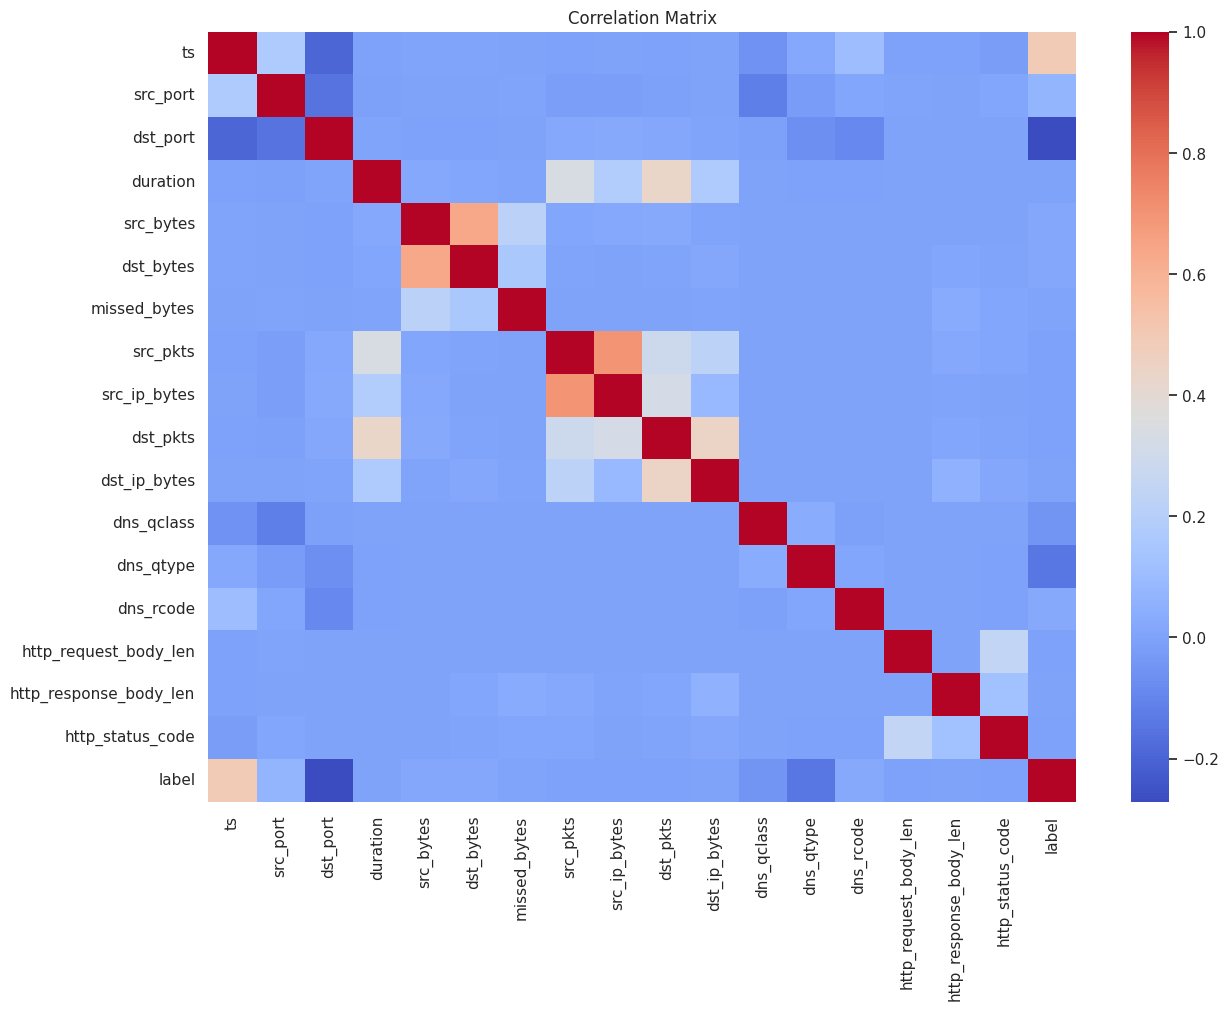

In [ ]:
# Convert relevant columns to numeric before correlation
for col in df4.select_dtypes(include=['object']).columns:
    try:
        df4[col] = pd.to_numeric(df4[col])
    except ValueError:
        # Handle columns that cannot be converted (e.g., encode them)
        print(f"Column '{col}' could not be converted to numeric and will be dropped.")
        df4 = df4.drop(columns=[col])  # Or apply encoding if needed

# Now calculate the correlation
corr = df4.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Correlation Matrix")

In [ ]:
corr['label'].sort_values(ascending=False).head(10)

,label
label,1.000000
ts,0.488816
src_port,0.069546
dns_rcode,0.025507
src_bytes,0.013713
dst_bytes,0.013001
missed_bytes,0.005464
duration,0.000607
dst_ip_bytes,-0.001338
http_response_body_len,-0.002280


Text(0.5, 1.0, 'Protocol Distribution')

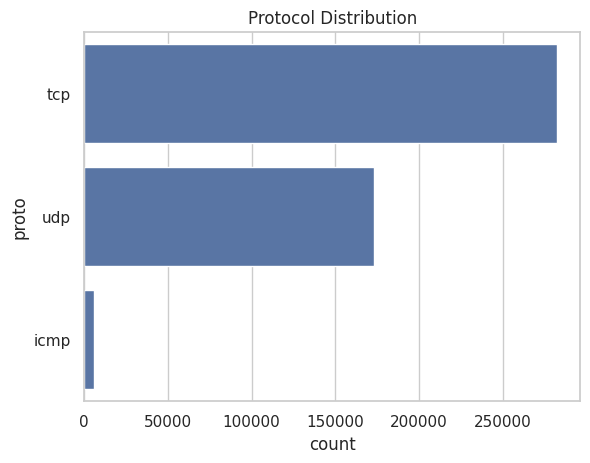

In [ ]:
sns.countplot(data=df, y='proto', order=df['proto'].value_counts().index)
plt.title("Protocol Distribution")

Text(0.5, 1.0, 'Connection State Distribution')

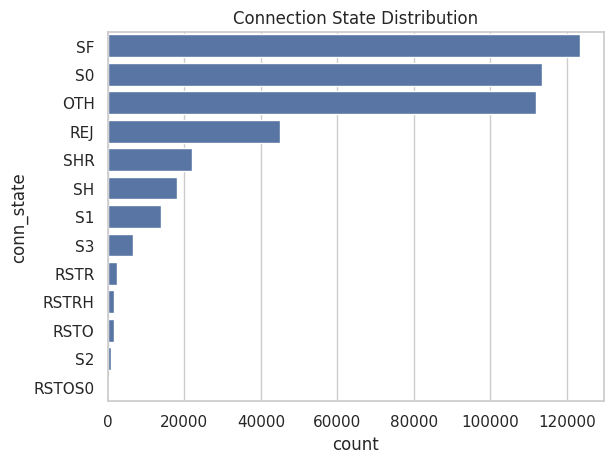

In [ ]:
sns.countplot(data=df, y='conn_state', order=df['conn_state'].value_counts().index)
plt.title("Connection State Distribution")

<Axes: xlabel='proto'>

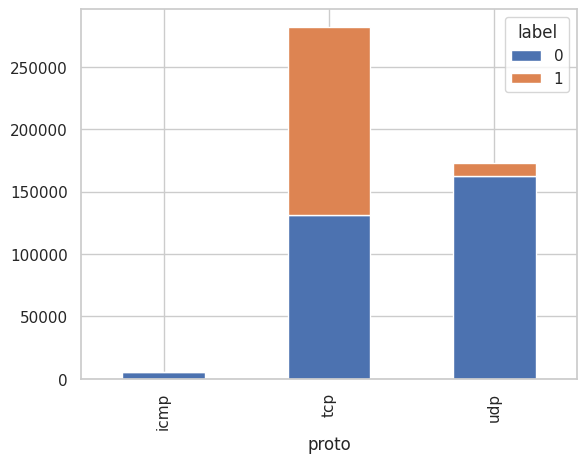

In [ ]:
pd.crosstab(df['proto'], df3['label']).plot(kind='bar', stacked=True)

# Two Pipelines would be created as we perform a Binary Classification and Multiclass Classification

In [ ]:
df3.head()

,ts,src_ip,src_port,dst_ip,dst_port,proto,duration,src_bytes,dst_bytes,conn_state,...,dst_pkts,dst_ip_bytes,dns_qclass,dns_qtype,dns_rcode,http_request_body_len,http_response_body_len,http_status_code,label,type
0,1554198358,3.122.49.24,1883,192.168.1.152,52976,tcp,80549.530260,1762852,41933215,OTH,...,2,236,0,0,0,0,0,0,0,normal
1,1554198358,192.168.1.79,47260,192.168.1.255,15600,udp,0.000000,0,0,S0,...,0,0,0,0,0,0,0,0,0,normal
2,1554198359,192.168.1.152,1880,192.168.1.152,51782,tcp,0.000000,0,0,OTH,...,0,0,0,0,0,0,0,0,0,normal
3,1554198359,192.168.1.152,34296,192.168.1.152,10502,tcp,0.000000,0,0,OTH,...,0,0,0,0,0,0,0,0,0,normal
4,1554198362,192.168.1.152,46608,192.168.1.190,53,udp,0.000549,0,298,SHR,...,2,354,0,0,0,0,0,0,0,normal


## Pipeline A: Binary Classification

In [ ]:
y_binary = df3['label']  # 0 = Normal, 1 = Attack

## Pipeline B: Multicalss Classification

In [ ]:
le = LabelEncoder()
df3['type_encoded'] = le.fit_transform(df3['type'])

y_multi = df3['type_encoded']


## Select Features and Target

In [ ]:
# Columns to always drop
drop_columns_common = ['ts', 'src_ip', 'dst_ip', 'src_port', 'dst_port']

# Binary Classification: drop 'type'
X_binary = df3.drop(columns=drop_columns_common + ['type', 'label'])

# Multiclass Classification: drop 'label'
X_multiclass = df3.drop(columns=drop_columns_common + ['label', 'type_encoded'])

In [ ]:
y_binary = df3['label']
le = LabelEncoder()
df3['type_encoded'] = le.fit_transform(df3['type'])
y_multi = df3['type_encoded']

## Perform Train Test Split and Standardization

In [ ]:
X_binary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461043 entries, 0 to 461042
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   proto                   461043 non-null  object 
 1   duration                461043 non-null  float64
 2   src_bytes               461043 non-null  int64  
 3   dst_bytes               461043 non-null  int64  
 4   conn_state              461043 non-null  object 
 5   missed_bytes            461043 non-null  int64  
 6   src_pkts                461043 non-null  int64  
 7   src_ip_bytes            461043 non-null  int64  
 8   dst_pkts                461043 non-null  int64  
 9   dst_ip_bytes            461043 non-null  int64  
 10  dns_qclass              461043 non-null  int64  
 11  dns_qtype               461043 non-null  int64  
 12  dns_rcode               461043 non-null  int64  
 13  http_request_body_len   461043 non-null  int64  
 14  http_response_body_l

In [ ]:
X_multiclass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461043 entries, 0 to 461042
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   proto                   461043 non-null  object 
 1   duration                461043 non-null  float64
 2   src_bytes               461043 non-null  int64  
 3   dst_bytes               461043 non-null  int64  
 4   conn_state              461043 non-null  object 
 5   missed_bytes            461043 non-null  int64  
 6   src_pkts                461043 non-null  int64  
 7   src_ip_bytes            461043 non-null  int64  
 8   dst_pkts                461043 non-null  int64  
 9   dst_ip_bytes            461043 non-null  int64  
 10  dns_qclass              461043 non-null  int64  
 11  dns_qtype               461043 non-null  int64  
 12  dns_rcode               461043 non-null  int64  
 13  http_request_body_len   461043 non-null  int64  
 14  http_response_body_l

In [ ]:
# Encode all object-type columns in X_binary
for col in X_binary.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_binary[col] = le.fit_transform(X_binary[col])

In [ ]:
# Do the same for X_multiclass
for col in X_multiclass.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_multiclass[col] = le.fit_transform(X_multiclass[col])

In [ ]:
# Binary
Xb_train, Xb_test, yb_train, yb_test = train_test_split(X_binary, y_binary, test_size=0.2, stratify=y_binary)
scaler_b = StandardScaler()
Xb_train = scaler_b.fit_transform(Xb_train)
Xb_test = scaler_b.transform(Xb_test)

In [ ]:
# Multiclass
Xm_train, Xm_test, ym_train, ym_test = train_test_split(X_multiclass, y_multi, test_size=0.2, stratify=y_multi)
scaler_m = StandardScaler()
Xm_train = scaler_m.fit_transform(Xm_train)
Xm_test = scaler_m.transform(Xm_test)

## Binary Classification Pipeline

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Define binary models
binary_models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100)
}

# Train and evaluate
for name, model in binary_models.items():
    model.fit(Xb_train, yb_train)
    yb_pred = model.predict(Xb_test)
    yb_proba = model.predict_proba(Xb_test)[:, 1]

    print(f"🔹 {name} (Binary)")
    print(classification_report(yb_test, yb_pred))
    print("ROC-AUC Score:", roc_auc_score(yb_test, yb_proba))
    print("-" * 50)


🔹 Logistic Regression (Binary)
              precision    recall  f1-score   support

           0       0.79      0.85      0.82     60000
           1       0.67      0.57      0.62     32209

    accuracy                           0.75     92209
   macro avg       0.73      0.71      0.72     92209
weighted avg       0.75      0.75      0.75     92209

ROC-AUC Score: 0.8180745557659868
--------------------------------------------------
🔹 Random Forest (Binary)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     60000
           1       1.00      1.00      1.00     32209

    accuracy                           1.00     92209
   macro avg       1.00      1.00      1.00     92209
weighted avg       1.00      1.00      1.00     92209

ROC-AUC Score: 1.0
--------------------------------------------------


In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neural_network import MLPClassifier

models_multiclass = {
    'Random Forest': RandomForestClassifier(),
    'MLP': MLPClassifier(hidden_layer_sizes=(100,), max_iter=300)
}

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Use decision_function for LinearSVC ROC curve
def get_binary_predictions(model, X_test, use_decision=False):
    y_pred = model.predict(X_test)
    if use_decision:
        y_score = model.decision_function(X_test)
    else:
        y_score = model.predict_proba(X_test)[:, 1]
    return y_pred, y_score

models_binary = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Linear SVM": LinearSVC()
}

for name, model in models_binary.items():
    model.fit(Xb_train, yb_train)
    use_decision = True if name == "Linear SVM" else False
    y_pred, y_score = get_binary_predictions(model, Xb_test, use_decision)

    print(f"\n🔹 {name} (Binary Classification)")
    print(classification_report(yb_test, y_pred))
    if not use_decision:
        auc = roc_auc_score(yb_test, y_score)
        print(f"ROC-AUC Score: {auc:.4f}")



🔹 Logistic Regression (Binary Classification)
              precision    recall  f1-score   support

           0       0.79      0.85      0.82     60000
           1       0.67      0.57      0.62     32209

    accuracy                           0.75     92209
   macro avg       0.73      0.71      0.72     92209
weighted avg       0.75      0.75      0.75     92209

ROC-AUC Score: 0.8181

🔹 Random Forest (Binary Classification)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     60000
           1       1.00      1.00      1.00     32209

    accuracy                           1.00     92209
   macro avg       1.00      1.00      1.00     92209
weighted avg       1.00      1.00      1.00     92209

ROC-AUC Score: 1.0000

🔹 Linear SVM (Binary Classification)
              precision    recall  f1-score   support

           0       0.78      0.84      0.81     60000
           1       0.65      0.56      0.60     32209

    accuracy

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Define multiclass models
models_multiclass = {
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Linear SVM (OvR)": OneVsRestClassifier(LinearSVC(max_iter=1000)),
    "MLP Classifier": MLPClassifier(hidden_layer_sizes=(100,), max_iter=300)
}

# Loop through and evaluate each model
for name, model in models_multiclass.items():
    model.fit(Xm_train, ym_train)
    ym_pred = model.predict(Xm_test)

    print(f"\n🔸 {name} (Multiclass Classification)")
    print(classification_report(ym_test, ym_pred))



🔸 Random Forest (Multiclass Classification)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4000
           1       1.00      1.00      1.00      4000
           2       1.00      1.00      1.00      4000
           3       1.00      1.00      1.00      4000
           4       1.00      0.98      0.99       209
           5       1.00      1.00      1.00     60000
           6       1.00      1.00      1.00      4000
           7       1.00      1.00      1.00      4000
           8       1.00      1.00      1.00      4000
           9       1.00      1.00      1.00      4000

    accuracy                           1.00     92209
   macro avg       1.00      1.00      1.00     92209
weighted avg       1.00      1.00      1.00     92209


🔸 Linear SVM (OvR) (Multiclass Classification)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4000
           1       0.99      0.98      


🔸 Random Forest (Multiclass Classification)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4000
           1       1.00      1.00      1.00      4000
           2       1.00      1.00      1.00      4000
           3       1.00      1.00      1.00      4000
           4       0.99      0.98      0.98       209
           5       1.00      1.00      1.00     60000
           6       1.00      1.00      1.00      4000
           7       1.00      1.00      1.00      4000
           8       1.00      1.00      1.00      4000
           9       1.00      1.00      1.00      4000

    accuracy                           1.00     92209
   macro avg       1.00      1.00      1.00     92209
weighted avg       1.00      1.00      1.00     92209



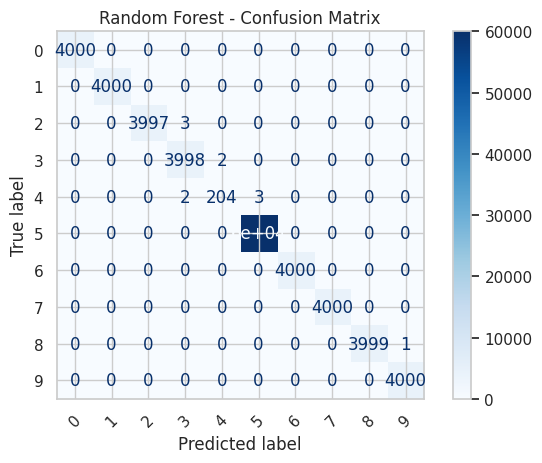


🔸 Linear SVM (OvR) (Multiclass Classification)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4000
           1       0.99      0.98      0.99      4000
           2       0.97      0.04      0.08      4000
           3       0.73      0.90      0.81      4000
           4       0.50      0.00      0.01       209
           5       0.78      0.97      0.86     60000
           6       0.00      0.00      0.00      4000
           7       1.00      0.01      0.01      4000
           8       0.00      0.00      0.00      4000
           9       1.00      0.99      1.00      4000

    accuracy                           0.80     92209
   macro avg       0.70      0.49      0.48     92209
weighted avg       0.75      0.80      0.73     92209



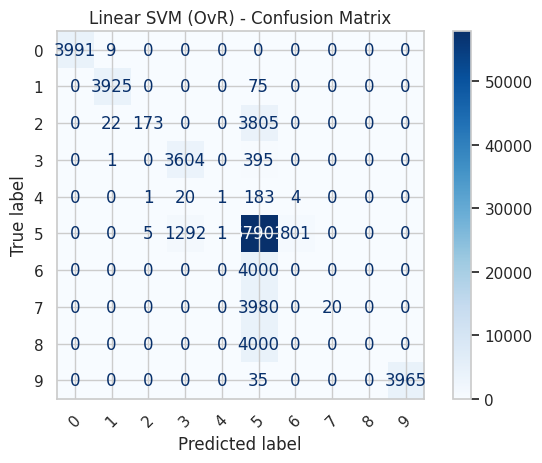


🔸 MLP Classifier (Multiclass Classification)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4000
           1       1.00      1.00      1.00      4000
           2       1.00      1.00      1.00      4000
           3       1.00      1.00      1.00      4000
           4       1.00      1.00      1.00       209
           5       1.00      1.00      1.00     60000
           6       1.00      1.00      1.00      4000
           7       1.00      1.00      1.00      4000
           8       1.00      1.00      1.00      4000
           9       1.00      1.00      1.00      4000

    accuracy                           1.00     92209
   macro avg       1.00      1.00      1.00     92209
weighted avg       1.00      1.00      1.00     92209



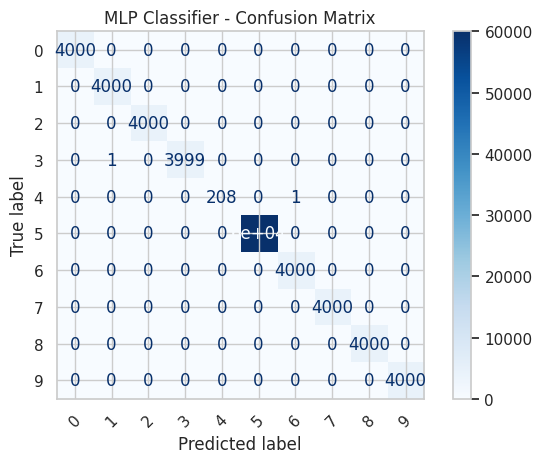

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define models
models_multiclass = {
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Linear SVM (OvR)": OneVsRestClassifier(LinearSVC(max_iter=1000)),
    "MLP Classifier": MLPClassifier(hidden_layer_sizes=(100,), max_iter=300)
}

# Loop and evaluate each
for name, model in models_multiclass.items():
    print(f"\n🔸 {name} (Multiclass Classification)")
    model.fit(Xm_train, ym_train)
    ym_pred = model.predict(Xm_test)

    # Classification report
    print(classification_report(ym_test, ym_pred))

    # Confusion Matrix
    cm = confusion_matrix(ym_test, ym_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues", xticks_rotation=45)
    plt.title(f"{name} - Confusion Matrix")
    plt.tight_layout()
    plt.show()


Random Forest Accuracy: 0.9999
Linear SVM (OvR) Accuracy: 0.7980
MLP Classifier Accuracy: 1.0000


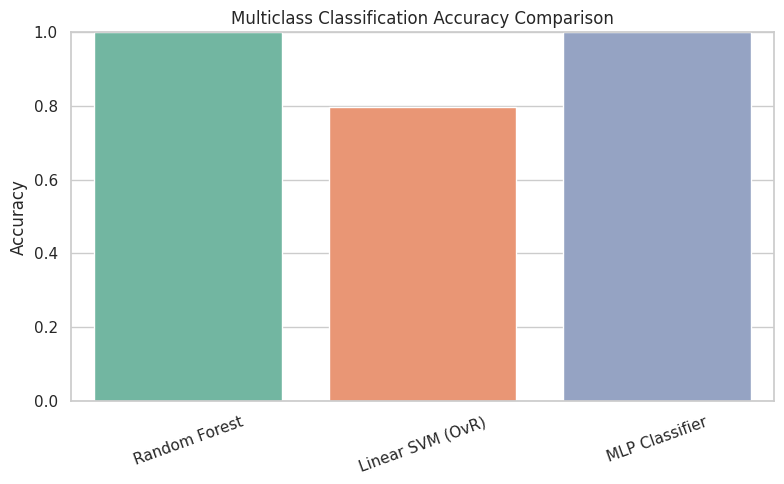

In [ ]:
from sklearn.metrics import accuracy_score

# Dictionary to store model accuracies
model_accuracies = {}

# Re-train and record accuracy
for name, model in models_multiclass.items():
    model.fit(Xm_train, ym_train)
    ym_pred = model.predict(Xm_test)
    acc = accuracy_score(ym_test, ym_pred)
    model_accuracies[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

# Plot the accuracy comparison
plt.figure(figsize=(8, 5))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette="Set2")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.title("Multiclass Classification Accuracy Comparison")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()
